# 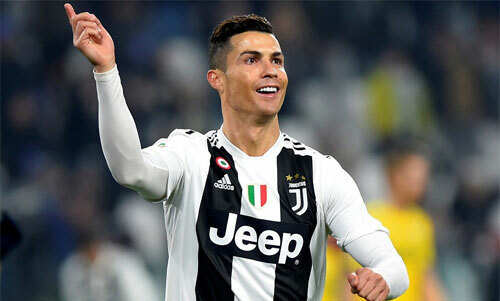
**Ảnh dùng để nén**

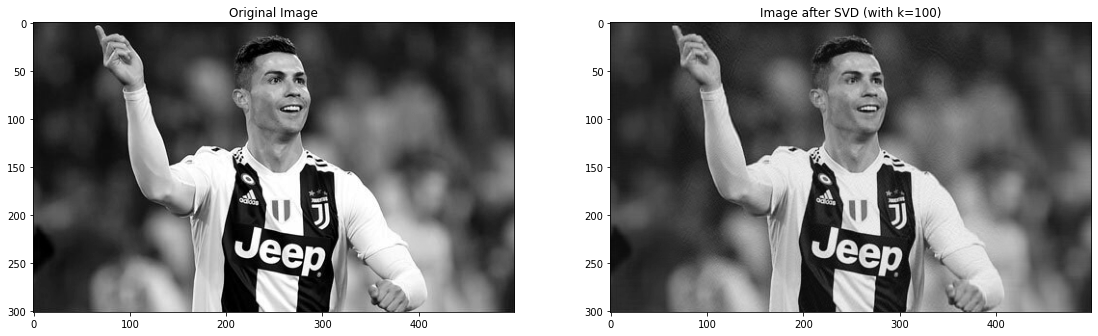

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
im = cv2.imread('/content/ronaldo1.bmp')
#Cách chuyển ảnh màu sang ảnh xám có thể dùng 1 trong 2 cách :
# im1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY )
im1 = (im[:,:,2]*0.3+im[:,:,1]*0.59+im[:,:,0]*0.11).astype('int32')
U, S, V =np.linalg.svd(im1, full_matrices= True)
# k được tính theo công thức:
#    k<((m*n)/(m+n+1))
# Chọn k=100
k = 100
#Cắt bớt k thành phần trong S,U,V
U1 = U[:,:k]
S1 = np.diag(S)[:k,:k]
V1 = V[:k,:]
#Lưu U*, S*, V* xuống file
np.save('/content/U*.npy', U1, allow_pickle=True)
np.save('/content/S*.npy', S1, allow_pickle=True)
np.save('/content/V*.npy', V1, allow_pickle=True)
#Load U*, S*, V* từ file
U = np.load('/content/U*.npy')
S = np.load('/content/S*.npy')
V = np.load('/content/V*.npy')
#Khôi phục ảnh I
I = np.dot(np.dot(U, S), V).astype('int32')
#Hiển thị lại ảnh
row = 1
column = 5
fig = plt.figure(figsize=[50,50])
ax1 = fig.add_subplot(row, column, 1)
plt.imshow(im1, cmap='gray')
ax2 = fig.add_subplot(row, column, 2)
plt.imshow(I, cmap='gray')
ax1.title.set_text('Original Image')
ax2.title.set_text(f'Image after SVD (with k={k})')
plt.show()